# Twierdenie Bayesa - wizualizacja

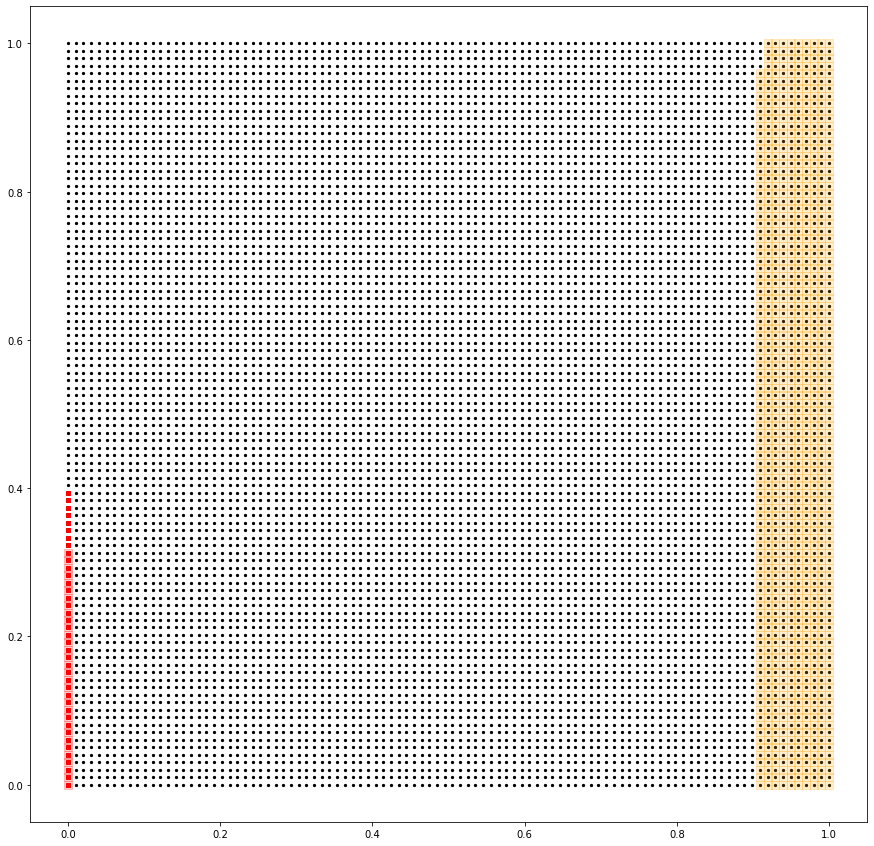

In [1]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0 ,1, 100)
y = np.ones(100)

plt.figure(figsize=(15, 15))
for i in x:
    plt.scatter(x, y*i, s=5, c='black')

for i in x[:40]:
    plt.scatter(0, i, c='red', s=20, marker='s')
    
for i in x[:32]:
    plt.scatter(0, i, c='red', s=80, alpha=.2, marker='s')

    
for i in x[-9:]:
    plt.scatter(y*i, x, c='orange', s=80, alpha=.2, marker='s')

for i in x[:96]:
    plt.scatter(x[-10], i, c='orange', s=80, alpha=.2, marker='s')

plt.show()

# Rozkłady Prawdopodobieństwa

## Rozkłady dyskretne

### Rozkład Bernulliego

Rozkład zero-jedynkowy – dyskretny rozkład prawdopodobieństwa, szczególny przypadek rozkładu dwupunktowego, dla którego zmienna losowa przyjmuje tylko wartości: 0 i 1.
Jest on na przykład rezultatem doświadczenia (zwanego próbą Bernoulliego), w wyniku którego określone zdarzenie 

W krajach anglojęzycznych rozkład ten nazywany jest Bernoulli distribution. W polskim piśmiennictwie jednak zwyczajowo rozkład Bernoulliego oznacza rozkład dwumianowy.

Podstawowe statystyki: 
średnia 0.7, 
wariancja: 0.21000000000000002, 
skośność: -0.8728715609439702, 
kurtoza: -1.2380952380952361


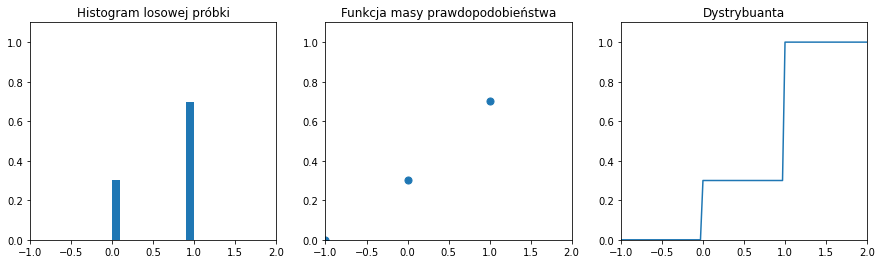

In [2]:
# Rozkład Bernulliego
# Rozkład zero-jedynkowy


import numpy as np
from scipy.stats import bernoulli
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# Parametr
p = 0.7

# Generowanie próbki
proba = bernoulli.rvs(p, size=1_000)  # Random variates.

ax1.set_title("Histogram losowej próbki")
ax1.hist(proba, weights=np.ones(len(proba)) / len(proba))

# Generowanie statystyk
mean, var, skew, kurt = bernoulli.stats(p, moments='mvsk')

print(f"Podstawowe statystyki: \nśrednia {mean}, \nwariancja: {var}, \nskośność: {skew}, \nkurtoza: {kurt}")

# CDF - Cumulative distribution function. - dystrybuanta
# Percent point function (inverse of cdf — percentiles).
x = np.arange(bernoulli.ppf(0., p),
                bernoulli.ppf(1, p)+1)
# x = np.array([0, 1])

# pmf - probability mass function
# Funkcja masy prawdopodobieństwa (ang. probability mass function, pmf) – funkcja dająca dla każdej liczby rzeczywistej 
# u prawdopodobieństwo, że dana dyskretna zmienna losowa przyjmie wartość 

ax2.set_title("Funkcja masy prawdopodobieństwa")
ax2.scatter(x, bernoulli.pmf(x, p), label='funkcja masy prawdopodobieństwa', s=50.0)
# ax.vlines(x, 0, bernoulli.pmf(x, p), colors='b', lw=5, alpha=0.5)

# rv = bernoulli(p)
# ax2.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen pmf')

# ax.hist(proba, bins=50, color='red', alpha=0.1) 

# ax2.legend(loc='best', frameon=False)

xd = np.linspace(-1, 2, 100)

ax3.set_title("Dystrybuanta")
ax3.plot(xd, bernoulli.cdf(xd, p=p))

x_lim = [-1, 2]
ax1.set_xlim(x_lim)
ax2.set_xlim(x_lim)
ax3.set_xlim(x_lim)

y_lim = [0, 1.1]
ax1.set_ylim(y_lim)
ax2.set_ylim(y_lim)
ax3.set_ylim(y_lim)

plt.show()

### Rozkład dwumianowy

Podstawowe statystyki: 
średnia 3.0, 
wariancja: 2.0999999999999996, 
skośność: 0.27602622373694174, 
kurtoza: -0.12380952380952373


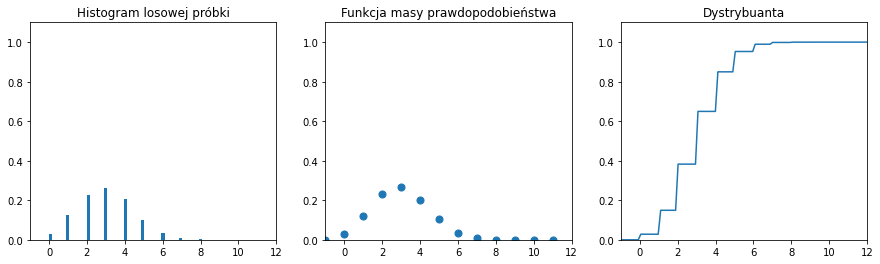

In [3]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# parametry rozkłądu
n = 10  # ilość prób
p = 0.3  # prawdopodobieństwo sukcesu w pojedyńczej próbie

# Generowanie próbki
proba = binom.rvs(n=n, p=p, size=10_000)  # Random variates.

ax1.set_title("Histogram losowej próbki")
ax1.hist(proba, weights=np.ones(len(proba)) / len(proba), bins=50)

# Generowanie teoretycznych statystyk
mean, var, skew, kurt = binom.stats(p=p, n=n, moments='mvsk')

print(f"Podstawowe statystyki: \nśrednia {mean}, \nwariancja: {var}, \nskośność: {skew}, \nkurtoza: {kurt}")

# Funkcja masy prawdopodobieństwa
p_min = binom.ppf(0., n, p)
p_max = binom.ppf(1, n, p)+2
x = np.arange(p_min, p_max)
ax2.set_title("Funkcja masy prawdopodobieństwa")
ax2.scatter(x, binom.pmf(x, p=p, n=n), label='funkcja masy prawdopodobieństwa', s=50.0)

# Dystrybuanta
xd = np.linspace(p_min, p_max, 100)
ax3.set_title("Dystrybuanta")
ax3.plot(xd, binom.cdf(xd, p=p, n=n))

x_lim = [p_min, p_max]
ax1.set_xlim(x_lim)
ax2.set_xlim(x_lim)
ax3.set_xlim(x_lim)

y_lim = [0, 1.1]
ax1.set_ylim(y_lim)
ax2.set_ylim(y_lim)
ax3.set_ylim(y_lim)

plt.show()

In [4]:
proba

array([2, 5, 5, ..., 2, 5, 1])

### Rozkład Poissona

Rozkład Poissona jest rozkładem dyskretnym (skokowym), który wyraża 
prawdopodobieństwo zdarzeń następujących po sobie z daną częstotliwością 
α(ilość zdarzeń na jednostkę czasową) w danym czasie. 
Zdarzenia zachodzą niezależnie, tzn. że czas następnego zdarzenia nie zależy od tego kiedy wystąpiło poprzednie zdarzenie.

Rozkład Poissona modeluje liczbę zdarzeń, które występują
w ciągu jednostkowego odcinka czasu przy założeniu, że
- liczby zdarzeń występujących na rozłącznych podprzedziałach są niezależne,
- prawdopodobieństwa wystąpienia zdarzenia na „krótkim” podprzedziale o długości h szacuje się przez  h + o(h),
- prawdopodobieństwo wystąpienia więcej niż jednego zdarzenia na „krótkim” podprzedziale o długości h szacuje. się przez o(h).



Rozważmy taki przykład: obserwujemy pewien przystanek autobusowy i stwierdzamy, że średnio autobusy przyjeżdżają z częstotliwością λ=4 autobusy na godzinę. Zdarza się jednak, że autobus nie przyjedzie- ulegnie wypadkowi – lub się spóźni. Wtedy może okazać się, że w jedną godzinę przyjadą 3 autobusy, a w następną 5. Jednak średnio w każdą godzinę będziemy obserwować 4 autobusy na tym przystanku. 
Zmienna opisująca kiedy przyjedzie autobus jest właśnie zmienną z rozkładu Poissona o intensywności λ=4.


W pewnym hipermarkecie zatrudnionych jest 90 pracowników. Prawdopodobieństwo że pracownik się spóźni danego dnia wynosi p=0.03.
Jakie jest prawdopodobieństwo,że w losowo wybranym miesiącu do pracy spóźniło się: 2 pracowników

Podstawowe statystyki: 
średnia 2.6999999999999997, 
wariancja: 2.6999999999999997, 
skośność: 0.6085806194501846, 
kurtoza: 0.3703703703703704


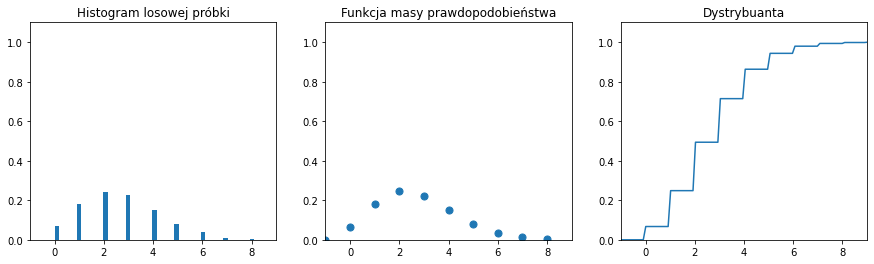

In [5]:
import numpy as np
from scipy.stats import poisson
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))

# parametry rozkładu
mu = 0.03*90  # średnia

# Generowanie próbki
proba = poisson.rvs(mu=mu, size=10_000)  # Random sample.

ax1.set_title("Histogram losowej próbki")
ax1.hist(proba, weights=np.ones(len(proba)) / len(proba), bins=50)

# Generowanie teoretycznych statystyk
mean, var, skew, kurt = poisson.stats(mu=mu, moments='mvsk')

print(f"Podstawowe statystyki: \nśrednia {mean}, \nwariancja: {var}, \nskośność: {skew}, \nkurtoza: {kurt}")

# Funkcja masy prawdopodobieństwa
p_min = poisson.ppf(0., mu)
p_max = poisson.ppf(0.99, mu)+2
x = np.arange(p_min, p_max)
ax2.set_title("Funkcja masy prawdopodobieństwa")
ax2.scatter(x, poisson.pmf(x, mu), label='funkcja masy prawdopodobieństwa', s=50.0)

# Dystrybuanta
xd = np.linspace(p_min, p_max, 100)
ax3.set_title("Dystrybuanta")
ax3.plot(xd, poisson.cdf(xd, mu=mu))

x_lim = [p_min, p_max]
ax1.set_xlim(x_lim)
ax2.set_xlim(x_lim)
ax3.set_xlim(x_lim)

y_lim = [0, 1.1]
ax1.set_ylim(y_lim)
ax2.set_ylim(y_lim)
ax3.set_ylim(y_lim)

plt.show()

## Rozkłady ciągłe

### Rozkład t-studenta

Często w zadaniach podane jest odchylenie standardowe, nie oznacza to jednak że jest to odchylenie standardowe populacji.
Np. Jeśli w treści zadania znajduje się informacja, że rozkład wielkości butelek 
w pewnym sklepie jest zmienną o odchyleniu standardowym 4 to jest to równoważne z tym, 
że odchylenie standardowe populacji wynosi 4. Jednak w przypadku gdy dana jest 
informacja, że wzięto 200 butelek i na ich podstawie wyznaczono odchylenie 
standardowe równe 3.4, oznacza to że odchylenie dotyczy tylko tej grupy, a odchylenie standardowe populacji jest nieznane.

Podstawowe statystyki: 
średnia 0.0, 
wariancja: 5.0, 
skośność: nan, 
kurtoza: inf


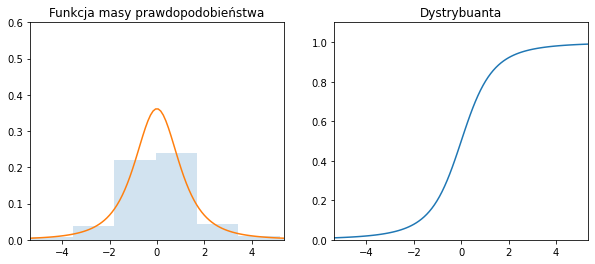

In [6]:
from scipy.stats import t
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 4))

# parametry rozkładu
df=2.5
# Generowanie próbki
proba = t.rvs(df=df, size=10_000)  # Random sample.

ax1.set_title("Histogram losowej próbki")
ax1.hist(proba, bins=50, density=True, histtype='stepfilled', alpha=0.2)

# Generowanie teoretycznych statystyk
mean, var, skew, kurt = t.stats(df=df, moments='mvsk')

print(f"Podstawowe statystyki: \nśrednia {mean}, \nwariancja: {var}, \nskośność: {skew}, \nkurtoza: {kurt}")

# Funkcja prawdopodobieństwa
# pdf - Probability density function.
# 
p_min = t.ppf(0.01, df)
p_max = t.ppf(0.99, df)
x = np.linspace(p_min, p_max, 100)
ax1.set_title("Funkcja masy prawdopodobieństwa")
ax1.plot(x, t.pdf(x, df), label='funkcja prawdopodobieństwa')

# Dystrybuanta
xd = np.linspace(p_min, p_max, 100)
ax3.set_title("Dystrybuanta")
ax3.plot(xd, t.cdf(xd, df=df))

x_lim = [p_min, p_max]
ax1.set_xlim(x_lim)
ax3.set_xlim(x_lim)

ax1.set_ylim([0, 0.6])
ax3.set_ylim([0, 1.1])

plt.show()

### Rozkład normalny

Rozkład normalny, inaczej zwany rozkładem Gaussa, krzywą Gaussa jest najważniejszym rozkładem teoretycznym prawdopodobieństwa w statystyce. Rozkład normalny jest też najbardziej intuicyjnym rozkładem statystycznym. W wielkim skrócie opisuje on sytuacje w świecie, gdzie większość przypadków jest bliska średniemu wynikowi, a im dany wynik bardziej odchyla się od średniej tym jest mniej reprezentowany. Najwięcej jest przypadków blisko przeciętnej. Im dalej oddalamy się od średniego wyniku, tym przypadków jest mniej. Można to z łatwością odnieść do rzeczywistych sytuacji. 


Podstawowe statystyki: 
średnia 0.0, 
wariancja: 1.0, 
skośność: 0.0, 
kurtoza: 0.0


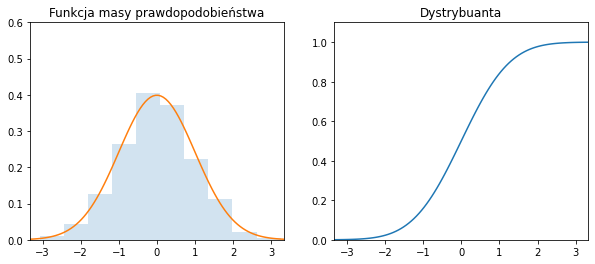

In [7]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(10, 4))

# parametry rozkładu
loc = 0.
scale = 1.
# Generowanie próbki
proba = norm.rvs(loc=loc, scale=scale, size=1_000)  # Random sample.

ax1.set_title("Histogram losowej próbki")
ax1.hist(proba, density=True, histtype='stepfilled', alpha=0.2)

# Generowanie teoretycznych statystyk
mean, var, skew, kurt = norm.stats(loc=loc, scale=scale, moments='mvsk')

print(f"Podstawowe statystyki: \nśrednia {mean}, \nwariancja: {var}, \nskośność: {skew}, \nkurtoza: {kurt}")

# Funkcja prawdopodobieństwa
# pdf - Probability density function.
p_min = norm.ppf(0.01, loc=loc, scale=scale)-1
p_max = norm.ppf(0.99, loc=loc, scale=scale)+1
x = np.linspace(p_min, p_max, 100)
ax1.set_title("Funkcja masy prawdopodobieństwa")
ax1.plot(x, norm.pdf(x, loc=loc, scale=scale), label='funkcja prawdopodobieństwa')

# Dystrybuanta
xd = np.linspace(p_min, p_max, 100)
ax3.set_title("Dystrybuanta")
ax3.plot(xd, norm.cdf(xd, loc=loc, scale=scale))

x_lim = [p_min, p_max]
ax1.set_xlim(x_lim)
ax3.set_xlim(x_lim)

ax1.set_ylim([0, 0.6])
ax3.set_ylim([0, 1.1])

plt.show()

### t-studenta vs. normalny



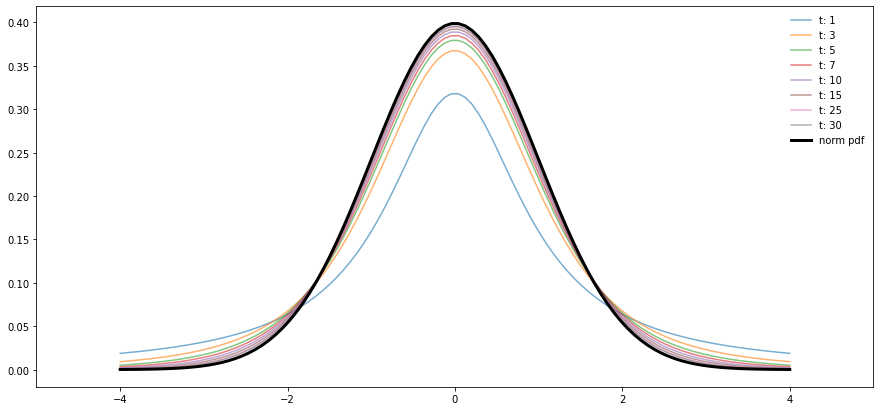

In [8]:
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots(1, 1, figsize=(15, 7))

x = np.linspace(-4, 4, 100)

for df in [1, 3, 5, 7, 10, 15, 25, 30]:
  ax.plot(x, t.pdf(x, df),
        alpha=0.6, label=f't: {df}')

ax.plot(x, norm.pdf(x),
        alpha=1, label='norm pdf', color='black', lw=3)


ax.legend(loc='best', frameon=False)
plt.xlim((-5, 5))  
plt.show()

In [9]:
%%bash
jupyter nbconvert \
    --to html Prawdopodobienstwo.ipynb \
    --output-dir ./HTML

[NbConvertApp] Converting notebook Prawdopodobienstwo.ipynb to html
[NbConvertApp] Writing 660380 bytes to HTML/Prawdopodobienstwo.html


test t-studenta dla jednej próbki

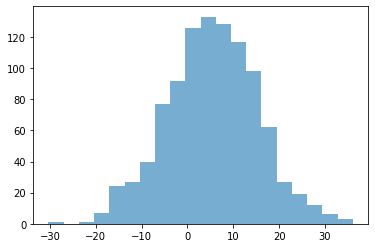

Ttest_1sampResult(statistic=17.250017576678164, pvalue=1.4545870228756149e-58)
Ttest_1sampResult(statistic=10.849178432470286, pvalue=5.306122616130391e-26)
Ttest_1sampResult(statistic=2.8481295022104374, pvalue=0.004487899046466862)
Ttest_1sampResult(statistic=1.2479197161584676, pvalue=0.21235287675901926)
Ttest_1sampResult(statistic=-0.3522900698935018, pvalue=0.7246950386858932)
Ttest_1sampResult(statistic=-1.9524998559454714, pvalue=0.051157880510910914)


In [10]:
from scipy import stats

loc=5
scale=10
x = stats.norm.rvs(loc=loc, scale=scale, size=1_000)
x = np.random.normal(loc=loc, scale=scale, size=1_000)

plt.hist(x, alpha=0.6, bins=20)
plt.show()

print(stats.ttest_1samp(x, 0))
print(stats.ttest_1samp(x, 2))
print(stats.ttest_1samp(x, 4.5))
print(stats.ttest_1samp(x, 5))
print(stats.ttest_1samp(x, 5.5))
print(stats.ttest_1samp(x, 6))

In [11]:
print(stats.ttest_1samp(x, 0))
print(stats.ttest_1samp(x, 2))
print(stats.ttest_1samp(x, 4.5))
print(stats.ttest_1samp(x, 5))
print(stats.ttest_1samp(x, 5.5))
print(stats.ttest_1samp(x, 6))

Ttest_1sampResult(statistic=17.250017576678164, pvalue=1.4545870228756149e-58)
Ttest_1sampResult(statistic=10.849178432470286, pvalue=5.306122616130391e-26)
Ttest_1sampResult(statistic=2.8481295022104374, pvalue=0.004487899046466862)
Ttest_1sampResult(statistic=1.2479197161584676, pvalue=0.21235287675901926)
Ttest_1sampResult(statistic=-0.3522900698935018, pvalue=0.7246950386858932)
Ttest_1sampResult(statistic=-1.9524998559454714, pvalue=0.051157880510910914)


### test t-studenta dla dwóch niezależnych próbek

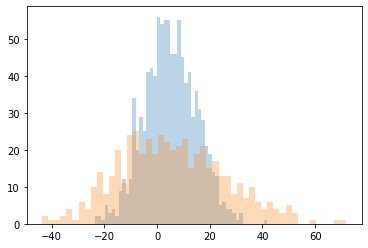

Ttest_indResult(statistic=-0.9731460418666875, pvalue=0.3306378333657959)


In [12]:
from scipy import stats

loc1 = 5
scale1 = 10
loc2 = 5
scale2 = 20
# x = stats.norm.rvs(loc=loc, scale=scale, size=1_000)
x1 = np.random.normal(loc=loc1, scale=scale1, size=1_000)
x2 = np.random.normal(loc=loc2, scale=scale2, size=500)

plt.hist(x1, alpha=0.3, bins=50)
plt.hist(x2, alpha=0.3, bins=50)
plt.show()

print(stats.ttest_ind(x1, x2))

### test t-studenta dla dwóch zależnych próbek

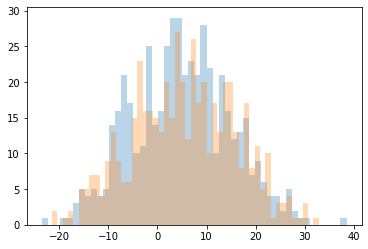

Ttest_relResult(statistic=-0.8649646491128219, pvalue=0.38747381829588334)


In [13]:
from scipy import stats

loc = 5
scale = 10

x1 = stats.norm.rvs(loc=loc, scale=scale, size=500)
x2 = (stats.norm.rvs(loc=loc, scale=scale, size=500)
         + stats.norm.rvs(scale=0.2, size=500))

plt.hist(x1, alpha=0.3, bins=50)
plt.hist(x2, alpha=0.3, bins=50)
plt.show()

print(stats.ttest_rel(x1, x2))

### Test normalności rozkładu

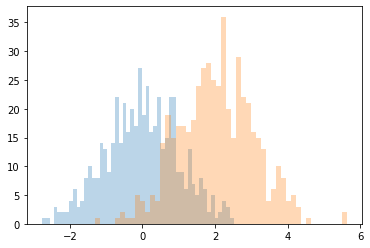

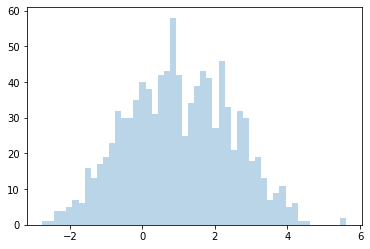

NormaltestResult(statistic=17.883866553606158, pvalue=0.00013078794630709287)

In [14]:
from scipy import stats

x1 = stats.norm.rvs(loc=0, scale=1, size=500)
x2 = stats.norm.rvs(loc=2, scale=1, size=500)

x = np.concatenate((x1, x2))

plt.hist(x1, alpha=0.3, bins=50)
plt.hist(x2, alpha=0.3, bins=50)
plt.show()

plt.hist(x, alpha=0.3, bins=50)
plt.show()

stats.normaltest(x)

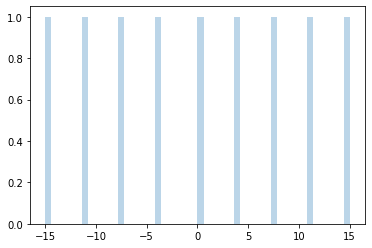

KstestResult(statistic=0.4443560271592436, pvalue=0.03885014008678778)


In [15]:
from scipy import stats

x = np.linspace(-15, 15, 9)

plt.hist(x, alpha=0.3, bins=50)
plt.show()

print(stats.kstest(x, 'norm'))

### Test shapiro-wilka

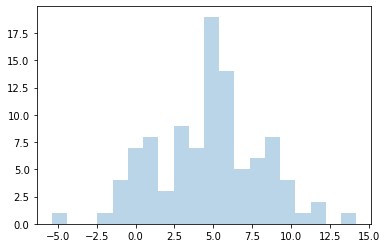

ShapiroResult(statistic=0.9893317222595215, pvalue=0.6108439564704895)


In [16]:
from scipy import stats

x = stats.norm.rvs(loc=5, scale=3, size=100)
plt.hist(x, alpha=0.3, bins=20)
plt.show()

print(stats.shapiro(x))

<hr>

In [17]:
%%bash
jupyter nbconvert \
    --to html Prawdopodobienstwo.ipynb \
    --output-dir ./HTML

[NbConvertApp] Converting notebook Prawdopodobienstwo.ipynb to html
[NbConvertApp] Writing 660380 bytes to HTML/Prawdopodobienstwo.html
